In [3]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
df0=pd.read_csv("jimcramer_tweets.csv")
df1=pd.read_csv("stockwits_tweets.csv")
df2=pd.read_csv("Benzinga_tweets.csv")
df3=pd.read_csv("YahooFinance_tweets.csv")
df = pd.concat([df0,df1,df2,df3], ignore_index=True)
df.to_csv("combineddata.csv")
df_x1=df["tweets"]
df_x=df_x1[2:]
df_y1=df["sentiment"]
df_y=df_y1[2:]

In [5]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [6]:
#TfidVect... is used to give count and weight of each word
#Multinomin.. is implementing naivebase model
#make_piplline is to execute these two jobs one after the other
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(x_train.apply(lambda x: np.str_(x)),y_train)
filename = 'finalized_naivebasemodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [7]:
loaded_model = pickle.load(open(filename, 'rb'))
labels=loaded_model.predict(x_test.apply(lambda x: np.str_(x)))

In [8]:
print(accuracy_score(y_test,labels))

0.753349875930521


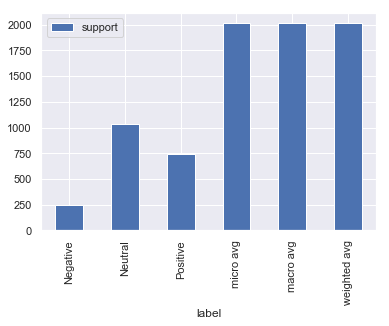

In [14]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,labels)
report_data=[]
#print(mat)
for label, metrics in classification_report(y_test, labels, output_dict=True).items():
    metrics['label'] = label
    report_data.append(metrics)

report_df = pd.DataFrame(
    report_data, 
    columns=['label', 'precision', 'recall', 'f1-score', 'support']
)

# Plot as a bar chart.
#report_df.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')
report_df.plot(y=['support'], x='label', kind='bar')
plt.savefig('confusion.png', bbox_inches = "tight")


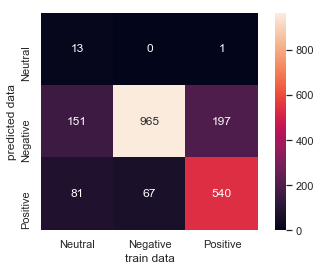

In [13]:
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=True,xticklabels=set(y_train),yticklabels=set(y_train))
plt.xlabel("train data")
plt.ylabel("predicted data")
plt.savefig("heatmap.png")